<h1>Text Classification using Logistic Regression<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Logistic-Regression-Theory" data-toc-modified-id="Logistic-Regression-Theory-1">Logistic Regression Theory</a></span><ul class="toc-item"><li><span><a href="#Regression-Revision" data-toc-modified-id="Regression-Revision-1.1">Regression Revision</a></span></li><li><span><a href="#Linear-Classifiers" data-toc-modified-id="Linear-Classifiers-1.2">Linear Classifiers</a></span><ul class="toc-item"><li><span><a href="#Linear-Classifier-Example" data-toc-modified-id="Linear-Classifier-Example-1.2.1">Linear Classifier Example</a></span></li></ul></li><li><span><a href="#Logistic-Regression-Classifier" data-toc-modified-id="Logistic-Regression-Classifier-1.3">Logistic Regression Classifier</a></span><ul class="toc-item"><li><span><a href="#Sigmoid-Function" data-toc-modified-id="Sigmoid-Function-1.3.1">Sigmoid Function</a></span></li><li><span><a href="#Maximum-Likelihood-Quality-Metric" data-toc-modified-id="Maximum-Likelihood-Quality-Metric-1.3.2">Maximum Likelihood Quality Metric</a></span></li><li><span><a href="#Gradient-Ascent-(TODO:-Add-some-theory-to-this-section)" data-toc-modified-id="Gradient-Ascent-(TODO:-Add-some-theory-to-this-section)-1.3.3">Gradient Ascent (TODO: Add some theory to this section)</a></span></li></ul></li></ul></li><li><span><a href="#Machine-Learning-Project-Lifecycle:-Second-Iteration" data-toc-modified-id="Machine-Learning-Project-Lifecycle:-Second-Iteration-2">Machine Learning Project Lifecycle: Second Iteration</a></span><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-2.1">Problem Statement</a></span></li><li><span><a href="#Training-Data" data-toc-modified-id="Training-Data-2.2">Training Data</a></span></li><li><span><a href="#Preprocessing-+-Feature-Engineering" data-toc-modified-id="Preprocessing-+-Feature-Engineering-2.3">Preprocessing + Feature Engineering</a></span></li><li><span><a href="#Machine-Learning-Algorithm:-Logistic-Regression" data-toc-modified-id="Machine-Learning-Algorithm:-Logistic-Regression-2.4">Machine Learning Algorithm: Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Estimating-Conditional-Probability-using-Link-Function" data-toc-modified-id="Estimating-Conditional-Probability-using-Link-Function-2.4.1">Estimating Conditional Probability using Link Function</a></span></li><li><span><a href="#Compute-derivative-of-log-likelihood-with-respect-to-a-single-coefficient" data-toc-modified-id="Compute-derivative-of-log-likelihood-with-respect-to-a-single-coefficient-2.4.2">Compute derivative of log likelihood with respect to a single coefficient</a></span></li><li><span><a href="#Compute-log-likelihood-which-is-given-by" data-toc-modified-id="Compute-log-likelihood-which-is-given-by-2.4.3">Compute log likelihood which is given by</a></span></li><li><span><a href="#Build-LR-model-using-Gradient-Ascent" data-toc-modified-id="Build-LR-model-using-Gradient-Ascent-2.4.4">Build LR model using Gradient Ascent</a></span></li><li><span><a href="#Predictions" data-toc-modified-id="Predictions-2.4.5">Predictions</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-2.5">Modeling</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-2.6">Model Evaluation</a></span></li><li><span><a href="#Quality-Metrics" data-toc-modified-id="Quality-Metrics-2.7">Quality Metrics</a></span></li><li><span><a href="#Model-Evaluation-on-Test-Dataset" data-toc-modified-id="Model-Evaluation-on-Test-Dataset-2.8">Model Evaluation on Test Dataset</a></span></li></ul></li><li><span><a href="#Homework" data-toc-modified-id="Homework-3">Homework</a></span></li><li><span><a href="#Resources" data-toc-modified-id="Resources-4">Resources</a></span></li></ul></div>

<img src="../images/classification.png" alt="Classification" style="width: 700px;"/>

## Logistic Regression Theory

### Regression Revision

### Linear Classifiers

- Called Linear Classifiers because output is weighted sum of input features.
- Training a classifier -> Learning the coefficients.

<img src='../images/linear_classifier_decision_boundry.jpg' alt='Linear Classifier decision boundry' style="width: 600px;" align="left">

#### Linear Classifier Example

*Linear Classifier example to classify document to check whether documents belong to Student Loan class or not*

*Training Data*

- +1 -> Belongs to Student Loan class
- -1 -> Doesnt belong to Student Loan Class

| Document | +1 or -1|
|:---------|:----------------:|
| EMI is high on Student Loan. | +1 |
| Interest is not great on Savings account.| -1 |
| Interest on Student loan has decreased.| + 1|

*Linear Classifier Model*

| Word(x) | Coefficient| Coefficient Value|
|:---------:|:----------------:| :----------------: |
|  | $ w_0 $ |1.0 |
| EMI | $ w_1 $ | 2.0 |
| Student | $ w_2 $ | 3.0 |
| Interest | $ w_3 $ | 1.0 |
| Loan | $ w_4 $ | 1.0 |
| Savings | $ w_5 $ | -2.0 |

*Classification*

$ y = sign(Score(x_i)) $

    - if sign is +1, input document belongs to Student Loan class
    - if sign is -1, input document doesn't belong to Student Loan class

$ Score(x_i) = w_0 + w_1 * x_i[1] + ... +  w_d * x_i[d] = w ^ T . X_i $

where

- $ x_i $ -> $ x_d $ are features.
- $ w_0 $ -> $ w_d $ are coefficients.

Assumes that x is 1 for all the token,

Q) Given `EMI Student`, check if this tokenised sentence belongs to `Student Loan` product category or not?

Q) Given `Interest Savings`, check if this tokenised sentence belongs to `Student Loan` product category or not?

### Logistic Regression Classifier

- Linear classifier/model which uses *Logistic/Logit Link Function* to shrink the output of $ Score(x_i) $ function to 0.0 - 1.0 probability range.

$ P(y_i | x_i, w) = Link Function \: ( \: Score \: ( \: w \: ^ t \: . h(x) \: ) \:)$

<img src='../images/logistic_classifier_to_lr_classifier.jpg' alt='Linear Classifier to LR Classifier' style="width: 550px;" align="left">

#### Sigmoid Function

- How to make predictions in term of probability?

$ sigmoid(Score) = 1 \: / \:  (1 + e ^ {-score}) $

| Score | -${\infty}$ | -2 | 0.0 | +2 | +${\infty}$ |
|:---------:|:-------:| :--: | :-------:| :-------:| :-------:|
| sigmoid(Score)|0|.12 |.5|.88| 1| 


In [3]:
import numpy as np

def sigmoid(value):
    return 1 / (1 + np.exp(-value))

In [4]:
import seaborn as sns;
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="whitegrid")

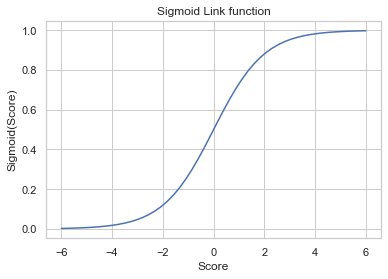

In [5]:
x = np.linspace(-6, 6)
y = sigmoid(x)

data = {'Score': x, 'Sigmoid(Score)': y}
ax = sns.lineplot(x='Score', y='Sigmoid(Score)', data=data)
ax.set(xlabel='Score', ylabel='Sigmoid(Score)')
ax.set(title='Sigmoid Link function');

#### Maximum Likelihood Quality Metric

- *How to evaluate the learned coefficients?*

    Model which returns the highest likelihood given the $ w_i ... w_d $


| Data Point | X[1] | X[2]  |  y  | Choose w to maximise                  |
|:----------:|:----:| :---: | :-: | :-----------------------------------: |
| x,y      | 2    | 1     | +1  | $ P(y = +1 | x, w) $   |
| x,y      | 0    | 2     | -1  | $ P(y = -1 | x, w) $   |
| x,y      | 6    | 7     | -1  | $ P(y = -1 | x, w) $   |
| x,y      | 19   | 1     | +1  | $ P(y = +1 | x, w) $  |

$ likelihood(w) = {\displaystyle \prod_{i=1}^N P(y_i | x_i, w)} $

<img src='../images/likelihood_example.jpg' alt='Maximum Likelihood Example' style="width: 600px;" align="left">

#### Gradient Ascent (TODO: Add some theory to this section)

- How to learn the coefficients?

*High Level Algorithm for Single data point*

- while not converged:

    - $ \displaystyle w ^ {t + 1} = w ^ {t}  + n {\displaystyle \frac{ \partial l}{\partial w}}$
    
For multiple data points, we will use d + 1 dimensional vector as

$ \displaystyle \nabla l (w) = \begin{vmatrix} {\displaystyle \frac{ \partial l}{\partial w_0}} \\ {\displaystyle \frac{ \partial l}{\partial w_1}} \\ ... \\ {\displaystyle \frac{ \partial l}{\partial w_d}} \end{vmatrix}$


In [6]:
!pip freeze | grep matplotlib

matplotlib==3.2.1


In [7]:
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.rcParams["figure.figsize"] = 8, 8
# from mpl_toolkits.mplot3d import axes3d

# x1 = np.linspace(-6, 8, 32)
# x2 = np.linspace(-6, 8, 32)

# X1, X2 = np.meshgrid(x1, x2)
# Y = np.sqrt(np.square(X1) + np.square(X2))

# #fig = plt.figure(figsize=plt.figaspect(0.5))
# fig = plt.figure(figsize=plt.figaspect(0.5))

# # First Plot
# ax = fig.add_subplot(1, 2, 1, projection='3d')

# surf = ax.plot_surface(X1, X2, Y * -1, cmap='jet')
# fig.colorbar(surf, shrink=0.5, aspect=10)

# # Second Plot
# ax = fig.add_subplot(1, 2, 2)

# cp = plt.contour(X1, X2, Y)
# plt.clabel(cp, inline=1, fontsize=10)
# plt.xlabel('Weight of #Loan')
# plt.ylabel('Weight of #Savings')
# plt.show()

**Derivative of Likelihood**

$ {\displaystyle \frac{ \partial (w)}{\partial w_j}} = \displaystyle \sum_{i=1}^N h_j(x_i) (1[y_i = +1] - P(y = +1 | x_i, w))$

where

- $1[y_i = +1]$ is 1 if $y_i$ = +1 or 0 if $y_i$ = -1

*Example*

- $ w_1 $ = 1
- n = 0.1

| X[1] | X[2]  |  y  | $P(y_i)$ | Contribution to $ w_1 $ derivative |
|----| --- | ---- | :---------------------: | -------------------------- |
| 2    | 1     | +1  |         00.05         | ?   |
| 0    | 2     | -1  |          00.02       | ?   |
| 3    | 3     | -1  |      00.05        | ?   |

*Coefficients update rule during each iteration*

Let assume that  $h_j(x_i) = 1$ in $ {\displaystyle \frac{ \partial l(w)}{\partial w_j}} = \displaystyle \sum_{i=1}^N h_j(x_i) (1[y_i = +1] - P(y = +1 | x_i, w))$

- $P(y=+1|x_i, w) \approx 1$
    - if $y_i=+1$
        - $\Delta_i = 1 * (1 - 1) \approx 0$
        - Dont change anything as predection is correct
    - elif $y_i=-1$
        - $\Delta_i = 1 * (1 - 1) \approx 1$
        - decrease $w_j$ for next iteration so that $P(y=+1|x_i, w)$ also decreases
- $P(y=+1|x_i, w) \approx 0$
    - if $y_i=-1$
        - $\Delta_i = 1 * (0 - 0) \approx 0$
        - Dont change anything as predection is correct
    - elif $y_i=+1$
        - $\Delta_i = 1 * (0 - 1) \approx 1$
        - increase $w_j$ for next iteration so that $P(y=+1|x_i, w)$ also increase

## Machine Learning Project Lifecycle: Second Iteration

- tf-idf
- Logistic Regression
- GridSearchCV
- precision, recall

### Problem Statement

Classify the Financial Consumer Complaints into different Product Categories given consumer complaint text.

**Product Categories**

- Credit reporting, repair, or other
- Debt collection
- Student loan
- Money transfer, virtual currency, or money service
- Bank account or service

### Training Data

[Kaggle: Consumer Complaint Database](https://www.kaggle.com/selener/consumer-complaint-database)

In [8]:
import pandas as pd

In [9]:
complaints_training_dataset = pd.read_csv('../datasets/consumer_complaints_training_dataset.csv')

In [10]:
complaints_training_dataset.head()

,Product,Complaint_text
0,"Credit reporting, repair, or other","My name is XXXX XXXX XXXX , not XXXX X..."
1,"Credit reporting, repair, or other",I was shocked when I reviewed my credit report...
2,"Credit reporting, repair, or other",Equifax misused of credit file. Disputing acco...
3,"Credit reporting, repair, or other",I am disturbed that you continue to list the v...
4,"Credit reporting, repair, or other",I went to multiple different credit report web...


In [11]:
complaints_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
Product           20000 non-null object
Complaint_text    20000 non-null object
dtypes: object(2)
memory usage: 312.6+ KB


**Q) What is the distribution of complaints for each product type?**

In [12]:
complaints_training_dataset.Product.unique()

array(['Credit reporting, repair, or other', 'Debt collection',
       'Student loan',
       'Money transfer, virtual currency, or money service',
       'Bank account or service'], dtype=object)

In [13]:
complaints_training_dataset\
    .groupby('Product')\
    [['Complaint_text']]\
    .count()\
    .rename(columns={'Complaint_text': 'Count'})\
    .sort_values('Count', ascending=False)

,Count
Product,
Bank account or service,4000
"Credit reporting, repair, or other",4000
Debt collection,4000
"Money transfer, virtual currency, or money service",4000
Student loan,4000


**Q) Find out the Occurances of Duplicate Text messages if any?**

In [14]:
complaints_training_dataset['Complaint_text'].nunique()

19913

In [15]:
duplicate_complaints = complaints_training_dataset['Complaint_text']\
    .value_counts()\
    [complaints_training_dataset['Complaint_text'].value_counts() > 2].index

In [16]:
len(duplicate_complaints)

9

### Preprocessing + Feature Engineering

- tf-idf

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

RANDOM_STATE = 19

In [56]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    complaints_training_dataset['Complaint_text'],
    complaints_training_dataset['Product'],
    test_size=.2,
    stratify=complaints_training_dataset['Product'],
    random_state=RANDOM_STATE)

In [58]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16000,), (4000,), (16000,), (4000,))

In [59]:
X_train_tfidf_vectorizer = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf_vectorizer = tfidf_vectorizer.transform(X_test)

In [60]:
len(tfidf_vectorizer.get_feature_names())

10000

In [61]:
tfidf_vectorizer.get_feature_names()[:10]

['00', '000', '001', '01', '02', '03', '04', '06', '07', '08']

In [62]:
tfidf_vectorizer.vocabulary_

{'xxxx': 9896,
 'account': 573,
 'listed': 5287,
 'credit': 2413,
 'report': 7407,
 'experian': 3478,
 'paid': 6246,
 'closed': 1917,
 '2007': 115,
 'like': 5261,
 'removed': 7349,
 'years': 9965,
 'employer': 3216,
 'submitted': 8432,
 'incorrect': 4675,
 'information': 4736,
 'hsa': 4459,
 'bank': 1253,
 'subsidiary': 8450,
 'webster': 9698,
 'money': 5736,
 'deducted': 2587,
 'paycheck': 6333,
 '15': 50,
 'days': 2517,
 'hired': 4368,
 'refusing': 7213,
 'release': 7289,
 'funds': 3966,
 'corrected': 2314,
 'requested': 7440,
 'verifying': 9521,
 'identity': 4524,
 'social': 8133,
 'security': 7851,
 'number': 5983,
 'began': 1315,
 'disputing': 2935,
 'items': 4987,
 'bureaus': 1571,
 'xx': 9894,
 'sent': 7895,
 'follow': 3790,
 'letters': 5220,
 'believe': 1331,
 'public': 6892,
 'records': 7142,
 'reporting': 7412,
 'accurately': 600,
 'compliance': 2058,
 'fcra': 3629,
 'fdcpa': 3630,
 'received': 7088,
 'didnt': 2783,
 'say': 7755,
 'company': 2025,
 'transcription': 8991,
 'vo

In [63]:
X_train_tfidf_vectorizer.shape, X_test_tfidf_vectorizer.shape

((16000, 10000), (4000, 10000))

In [64]:
# X_train_array = X_train_tfidf_vectorizer.toarray()

In [65]:
# X_train_array.shape

In [66]:
# def raw_text_to_vocab(text_index):
#     print(X_train.iloc[text_index])
#     for index, exists in enumerate(X_train_array[text_index]):
#         if exists:
#             print(index, '->', tfidf_vectorizer.get_feature_names()[index], exists)

In [67]:
# raw_text_to_vocab(0)

In [68]:
from sklearn.feature_selection import chi2
import numpy as np

N = 10
for product in complaints_training_dataset['Product'].unique():
  features_chi2 = chi2(X_train_tfidf_vectorizer, y_train == product)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf_vectorizer.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("\n==> %s:" %(product))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))


==> Credit reporting, repair, or other:
  * Most Correlated Unigrams are: remove, bureaus, inquiry, inquiries, reporting, transunion, experian, credit, report, equifax

==> Debt collection:
  * Most Correlated Unigrams are: agency, calling, company, collector, recovery, validation, owe, collect, collection, debt

==> Student loan:
  * Most Correlated Unigrams are: plan, payment, forbearance, school, repayment, payments, student, loan, loans, navient

==> Money transfer, virtual currency, or money service:
  * Most Correlated Unigrams are: moneygram, funds, support, transaction, western, wire, money, transfer, paypal, coinbase

==> Bank account or service:
  * Most Correlated Unigrams are: atm, america, fees, bonus, deposit, branch, check, checking, overdraft, bank


### Machine Learning Algorithm: Logistic Regression

#### Estimating Conditional Probability using Link Function

Recall from lecture that the link function is given by:
$$
P(y_i = +1 | \mathbf{x}_i,\mathbf{w}) = \frac{1}{1 + \exp(-\mathbf{w}^T h(\mathbf{x}_i))},
$$

where the feature vector $h(\mathbf{x}_i)$ represents the word counts of **important_words** in the review  $\mathbf{x}_i$. Complete the following function that implements the link function:

Since the word counts are stored as columns in **feature_matrix**, each $i$-th row of the matrix corresponds to the feature vector $h(\mathbf{x}_i)$:
$$
[\text{feature_matrix}] =
\left[
\begin{array}{c}
h(\mathbf{x}_1)^T \\
h(\mathbf{x}_2)^T \\
\vdots \\
h(\mathbf{x}_N)^T
\end{array}
\right] =
\left[
\begin{array}{cccc}
h_0(\mathbf{x}_1) & h_1(\mathbf{x}_1) & \cdots & h_D(\mathbf{x}_1) \\
h_0(\mathbf{x}_2) & h_1(\mathbf{x}_2) & \cdots & h_D(\mathbf{x}_2) \\
\vdots & \vdots & \ddots & \vdots \\
h_0(\mathbf{x}_N) & h_1(\mathbf{x}_N) & \cdots & h_D(\mathbf{x}_N)
\end{array}
\right]
$$

By the rules of matrix multiplication, the score vector containing elements $\mathbf{w}^T h(\mathbf{x}_i)$ is obtained by multiplying **feature_matrix** and the coefficient vector $\mathbf{w}$.
$$
[\text{score}] =
[\text{feature_matrix}]\mathbf{w} =
\left[
\begin{array}{c}
h(\mathbf{x}_1)^T \\
h(\mathbf{x}_2)^T \\
\vdots \\
h(\mathbf{x}_N)^T
\end{array}
\right]
\mathbf{w}
= \left[
\begin{array}{c}
h(\mathbf{x}_1)^T\mathbf{w} \\
h(\mathbf{x}_2)^T\mathbf{w} \\
\vdots \\
h(\mathbf{x}_N)^T\mathbf{w}
\end{array}
\right]
= \left[
\begin{array}{c}
\mathbf{w}^T h(\mathbf{x}_1) \\
\mathbf{w}^T h(\mathbf{x}_2) \\
\vdots \\
\mathbf{w}^T h(\mathbf{x}_N)
\end{array}
\right]
$$

In [69]:
def sigmoid(scores):
    return 1.0 / (1 + np.exp(-scores))

def predict_probability(feature_matrix, coefficients):
    scores = np.dot(feature_matrix, coefficients)
    predictions = sigmoid(scores)
    #predictions = 1.0 / (1 + np.exp(-scores))
    return predictions

In [70]:
dummy_feature_matrix = np.array([[1.,2.,3.], [1.,-1.,-1]])
dummy_coefficients = np.array([1., 3., -1.])

correct_scores      = np.array( [ 1.*1. + 2.*3. + 3.*(-1.),          1.*1. + (-1.)*3. + (-1.)*(-1.) ] )
correct_predictions = np.array( [ 1./(1+np.exp(-correct_scores[0])), 1./(1+np.exp(-correct_scores[1])) ] )

print('The following outputs must match ')
print('------------------------------------------------')
print('correct_predictions           =', correct_predictions)
print('output of predict_probability =', predict_probability(dummy_feature_matrix, dummy_coefficients))

The following outputs must match 
------------------------------------------------
correct_predictions           = [0.98201379 0.26894142]
output of predict_probability = [0.98201379 0.26894142]


#### Compute derivative of log likelihood with respect to a single coefficient

$$
\frac{\partial\ell}{\partial w_j} = \sum_{i=1}^N h_j(\mathbf{x}_i)\left(\mathbf{1}[y_i = +1] - P(y_i = +1 | \mathbf{x}_i, \mathbf{w})\right)
$$

We will now write a function that computes the derivative of log likelihood with respect to a single coefficient $w_j$. The function accepts two arguments:
* `errors` vector containing $\mathbf{1}[y_i = +1] - P(y_i = +1 | \mathbf{x}_i, \mathbf{w})$ for all $i$.
* `feature` vector containing $h_j(\mathbf{x}_i)$  for all $i$.

In [71]:
def feature_derivative(errors, feature):
    #derivative = np.dot(np.transpose(errors), feature)
    derivative = np.dot(errors, feature)
    return derivative

#### Compute log likelihood which is given by

$$\ell\ell(\mathbf{w}) = \sum_{i=1}^N \Big( (\mathbf{1}[y_i = +1] - 1)\mathbf{w}^T h(\mathbf{x}_i) - \ln\left(1 + \exp(-\mathbf{w}^T h(\mathbf{x}_i))\right) \Big) $$

In [72]:
def compute_log_likelihood(feature_matrix, target_labels, target_label, coefficients):
    indicator = (target_labels == target_labels)
    #print(feature_matrix.shape, coefficients.shape)
    scores = np.dot(feature_matrix, coefficients)
    errors = np.transpose(np.array([indicator])) - 1
    #lp = np.sum(errors * scores - np.log(sigmoid(scores)))
    #print(f'Indicator shape:{indicator.shape}, scores shape:{scores.shape}, sigmoid shape: {sigmoid(scores).shape}')
    lp = np.sum((indicator - 1) * scores - np.log(sigmoid(scores)))
    return lp

In [73]:
np.dot(dummy_feature_matrix, dummy_coefficients).shape

(2,)

In [74]:
dummy_feature_matrix = np.array([[1.,2.,3.], [1.,-1.,-1]])
dummy_coefficients = np.array([1., 3., -1.])
dummy_sentiment = np.array([-1, 1])

correct_indicators  = np.array( [ -1==+1, 1==+1 ] )
correct_scores      = np.array( [ 1.*1. + 2.*3. + 3.*(-1.),  1.*1. + (-1.)*3. + (-1.)*(-1.) ] )
correct_first_term  = np.array( [ (correct_indicators[0]-1)*correct_scores[0],
                                 (correct_indicators[1]-1)*correct_scores[1] ] )
correct_second_term = np.array( [ np.log(1. + np.exp(-correct_scores[0])), 
                                 np.log(1. + np.exp(-correct_scores[1])) ] )

correct_ll          =      sum( [ correct_first_term[0]-correct_second_term[0],
                                 correct_first_term[1]-correct_second_term[1] ] ) 

print('The following outputs must match ')
print('------------------------------------------------')
print('correct_log_likelihood           =', correct_ll)
print('output of compute_log_likelihood =', compute_log_likelihood(dummy_feature_matrix, dummy_sentiment, 1, dummy_coefficients))

The following outputs must match 
------------------------------------------------
correct_log_likelihood           = -5.331411615436032
output of compute_log_likelihood = 1.3314116154360325


#### Build LR model using Gradient Ascent

In [75]:
np.ones((X_train_tfidf_vectorizer.shape[0], 1))[:, 0].shape

(16000,)

In [92]:
from math import sqrt

def lr(feature_matrix, target_labels, target_label,
       initial_coefficients, step_size, max_iterations):
    coefficients = np.array(initial_coefficients)
    for iteration in range(max_iterations):
        predictions = predict_probability(feature_matrix, coefficients)
        
        indicator = (target_labels == target_label)
        
        #errors = np.transpose(np.array([indicator])) - predictions
        #print(indicator.shape, predictions.shape)
        #errors = indicator - predictions[:, 0]
        errors = indicator - predictions
        
        for j in range(len(coefficients)):
            derivative = feature_derivative(errors, feature_matrix[:, j])
            coefficients[j] += step_size * derivative
            
        if iteration <= 15 or (iteration <= 100 and iteration % 10 == 0)\
            or (iteration <= 1000 and iteration % 100 == 0)\
            or (iteration <= 10000 and iteration % 1000 == 0)\
            or iteration % 10000 == 0:
            lp = compute_log_likelihood(feature_matrix, target_labels,
                                        target_label, coefficients)
            print(f'Iteration: {iteration} -> Likelihood value: {lp}')
            predictions = predict_probability(feature_matrix, coefficients)
            print(predictions.min(), predictions.max(), (predictions > .5).sum())
    return coefficients

In [105]:
step_size=1e-3
max_iter=1001
target_labels = y_train
target_label = 'Student loan'
constant_feature = np.ones((X_train_tfidf_vectorizer.shape[0], 1))
features_matrix = np.hstack((constant_feature, X_train_tfidf_vectorizer.toarray()))
initial_coefficients = np.zeros(features_matrix.shape[1])
student_loan_lr_coeff = lr(features_matrix,
                          target_labels,
                          target_label,
                          initial_coefficients,
                          step_size,
                          max_iter)

Iteration: 0 -> Likelihood value: 82352.05858012925
0.0030372608326246207 0.009156347455813398 0
Iteration: 1 -> Likelihood value: 31706.16918857883
0.09520851970820396 0.2218590040790422 0
Iteration: 2 -> Likelihood value: 18746.28863036439
0.23012775691780843 0.5154437086894701 6
Iteration: 3 -> Likelihood value: 44638.488252498566
0.03191417542589787 0.16442568698798038 0
Iteration: 4 -> Likelihood value: 14780.903849553406
0.27605756300582485 0.7294161457656626 2171
Iteration: 5 -> Likelihood value: 62327.77784179713
0.007799516611473133 0.09291302055056874 0
Iteration: 6 -> Likelihood value: 19499.806110487752
0.1637885963821367 0.7422926380849997 1158
Iteration: 7 -> Likelihood value: 44033.84915067276
0.02407348501407484 0.35835992778842324 0
Iteration: 8 -> Likelihood value: 15969.959128814611
0.19843358751779083 0.8674633724409107 2707
Iteration: 9 -> Likelihood value: 58697.09206192693
0.007436741287808554 0.24840138277497736 0
Iteration: 10 -> Likelihood value: 18969.1945128

#### Predictions

- 1000 iterations -> 1e-5 -> 422 student loan prediction -> 0.0796844321786911(min prob) 0.7276472670085411 (max pro)
- 1000 iterations -> 1e-4 -> 2701 -> 0.004082467781937289 0.999257866186728 -> 39547.86471785138
- 100 iterations -> 1e-3 -> 2716 -> 0.0037466154113775 0.9993916481921669 -> 39971.2001232202
- 500 iterations -> 1e-3 -> 3000 -> 0.00016002748416665656 0.9999960208123433 -> 51832.90971341831

In [107]:
print((target_labels == 'Student loan').sum())
print(features_matrix.shape, student_loan_lr_coeff.shape)
print(student_loan_lr_coeff.min(), student_loan_lr_coeff.max())
predictions = predict_probability(features_matrix, student_loan_lr_coeff)
print(predictions.min(), predictions.max())
print((predictions > .5).sum())

3200
(16000, 10001) (10001,)
-5.369149911651749 11.735093259852734
0.00016002748416665656 0.9999960208123433
3000


### Modeling

In [41]:
y_train.unique()

array(['Credit reporting, repair, or other', 'Bank account or service',
       'Debt collection',
       'Money transfer, virtual currency, or money service',
       'Student loan'], dtype=object)

In [42]:
!pip freeze | grep scikit

scikit-image==0.14.2
scikit-learn==0.22.2.post1


In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lr_model = LogisticRegression(penalty='none', max_iter=301, random_state=RANDOM_STATE)

In [45]:
%%time

lr_model.fit(X_train_tfidf_vectorizer, y_train == 'Student loan')

CPU times: user 5.07 s, sys: 778 ms, total: 5.84 s
Wall time: 1.31 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=301,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=19, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
lr_model.classes_

array([False,  True])

In [47]:
lr_model.coef_

array([[  54.40205571, -202.64857603,   36.4316644 , ...,   -0.46870238,
          -2.14389495,  241.53657657]])

In [48]:
predictions = lr_model.predict(X_train_tfidf_vectorizer)
(predictions == True).sum()

3200

In [49]:
print(lr_model.predict(X_train_tfidf_vectorizer)[:10])
print(lr_model.predict_proba(X_train_tfidf_vectorizer)[:10])

[False False False False False False False False  True False]
[[1.00000000e+000 1.70393570e-050]
 [1.00000000e+000 1.44653428e-124]
 [1.00000000e+000 1.54972729e-168]
 [1.00000000e+000 3.88168233e-064]
 [1.00000000e+000 3.58657256e-233]
 [1.00000000e+000 3.89678269e-153]
 [1.00000000e+000 3.38501800e-153]
 [1.00000000e+000 1.42942332e-136]
 [0.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.60953165e-211]]


In [50]:
predictions = lr_model.predict_proba(X_train_tfidf_vectorizer)
(predictions[:, 1] > .5).sum()

3200

In [51]:
def print_top10(vectorizer, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    for i, class_label in enumerate(class_labels):
        top10 = np.argsort(clf.coef_[i])[-10:]
        print("\n==> %s:" %(class_label))
        print("    * %s" % (", ".join(feature_names[j] for j in top10)))

In [52]:
print_top10(tfidf_vectorizer, lr_model, y_train.unique())


==> Credit reporting, repair, or other:
    * ita, paperwork, mohela, classes, deferment, consolidated, repayment, ameirica, fedloan, navient


IndexError: index 1 is out of bounds for axis 0 with size 1

### Model Evaluation

- Cross Validation
- Hyper Parameter Tunning

In [53]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [54]:
cv_scores = cross_val_score(lr_model, X_train_tfidf_vectorizer, y_train == 'Student loan', cv=5)

In [55]:
print(cv_scores.mean())
print(cv_scores)

0.9570000000000001
[0.956875  0.9628125 0.9503125 0.9565625 0.9584375]


In [39]:
params_grid = {
    'max_iter': [100, 1000, 2500, 5000, 7500, 10000]
}

grid_search = GridSearchCV(LogisticRegression(penalty='none',
                                              random_state=RANDOM_STATE),
                           params_grid, cv=5,
                           n_jobs=-1, verbose=1)

grid_search.fit(X_train_tfidf_vectorizer, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.4min finished
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='none',
                                          random_state=19, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_iter': [100, 1000, 2500, 5000, 7500, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [40]:
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.cv_results_)

0.8286250000000001
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=19, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
{'mean_fit_time': array([ 3.46824985, 10.35557775, 10.80008135, 10.5697371 , 10.29876566,
       10.37499719]), 'std_fit_time': array([0.16070535, 3.61185528, 3.8637648 , 3.76246566, 3.35653672,
       3.41183422]), 'mean_score_time': array([0.00523715, 0.00497565, 0.00496216, 0.00497088, 0.00483651,
       0.00499339]), 'std_score_time': array([5.09720843e-04, 5.97581032e-05, 2.14665628e-04, 1.54124997e-04,
       1.64535244e-04, 2.05502676e-04]), 'param_max_iter': masked_array(data=[100, 1000, 2500, 5000, 7500, 10000],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max

### Quality Metrics

In [41]:
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             precision_score,
                             recall_score)

import seaborn as sns;
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
predictions = lr.predict(X_test_tfidf_vectorizer)

In [43]:
accuracy_score(y_test, predictions)

0.82425

In [44]:
conf_matrix = confusion_matrix(y_test, predictions, labels=y_test.unique())
conf_matrix

array([[660,  32,  10,  80,  18],
       [ 32, 634,  24,   5, 105],
       [ 12,  38, 703,  10,  37],
       [ 94,  21,   1, 676,   8],
       [ 20, 120,  25,  11, 624]])

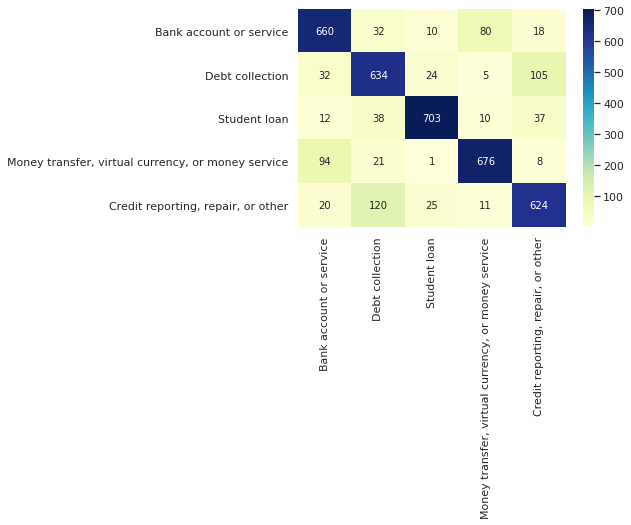

In [45]:
sns.heatmap(conf_matrix,
            cmap='YlGnBu',
            annot=True,
            fmt="d",
            xticklabels=y_test.unique(),
            yticklabels=y_test.unique())

In [46]:
recall_score(y_test, predictions, labels=y_test.unique(), average='macro')

0.8242499999999999

In [47]:
precision_score(y_test, predictions, labels=y_test.unique(), average='micro')

0.82425

### Model Evaluation on Test Dataset

- Note: Retrain the model using full training dataset.

## Homework

## Resources